In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
import os

In [3]:
data_folder = os.path.join(os.path.abspath(os.curdir), os.pardir, "data")

In [4]:
training_data = os.path.join(data_folder, "interim", "train_train.csv")

In [5]:
df = pd.read_csv(training_data)

In [6]:
df.head()

,Unnamed: 0,item_id,user_id,region,city,parent_category_name,category_name,param_1,param_2,param_3,title,description,price,item_seq_number,activation_date,user_type,image,image_top_1,deal_probability
0,254569,d45eaa1bf991,9fc6e326d6d8,Челябинская область,Челябинск,Для дома и дачи,Ремонт и строительство,Стройматериалы,NaN,NaN,Карнавал черный 6062 kerama marazzi,25*40 в количестве 3м2,650.0,3,2017-03-21,Private,NaN,NaN,0.00000
1,1068997,b06b078655a8,038a3bfc1c66,Самарская область,Самара,Бытовая электроника,Телефоны,iPhone,NaN,NaN,Айфон 4s,"айфон в идеале,полный комплект ,торг мизерный,...",5000.0,16,2017-03-16,Private,01ef194ae81da054c15816766fd2181e58cef40f507393...,3033.0,0.76786
2,690902,33ae8dd1de20,72b14fed8a2f,Башкортостан,Туймазы,Для бизнеса,Оборудование для бизнеса,Промышленное,NaN,NaN,Пресс гидравлический,ПРЕСС ЭЛЕКТРО ГИДРАВЛИЧЕСКИЙ 30 ТОН НА 380 В,NaN,11,2017-03-21,Private,bc7b416fd3244b57871ded4e58feeeafbfa87e42db20f2...,1392.0,0.07656
3,1182507,9e8d31b1aa80,d85f696ef3c0,Ставропольский край,Пятигорск,Транспорт,Автомобили,С пробегом,ВАЗ (LADA),2112,"ВАЗ 2112, 2004",Машина находится в залукокоаже. В хорошом сос...,147000.0,47,2017-03-22,Private,138da7fca63186972a0812b970ef5f5732b5e8eb11bf29...,1132.0,0.00000
4,135941,9ca9c0c0c590,2cc64b00d32f,Башкортостан,Уфа,Личные вещи,"Одежда, обувь, аксессуары",Женская одежда,Другое,NaN,Продам свадебную накидку,Продам свадебную накидку,300.0,47,2017-03-28,Private,98864bf47b62c720c1989e8062eeb642e3d1fbf9070dfe...,603.0,0.00000


Drop Unnamed, item_id, city, bytt ut user_id med user_active_ads, dropp param_2 og 3, bytt ut city med population_number, dropp item_seq_number, activation_date byttes med days_since_activation. Dropp image_top_1 (fordi det fanges opp av CNN). 

In [22]:
df.image_top_1.value_counts().quantile(0.92)

928.7200000000003

## Average deal probability for user_id

In [28]:
df.shape

(1202739, 19)

In [29]:
df.user_id.unique().shape

(660808,)

In [30]:
df = df.join(pd.DataFrame({"size" : df.groupby("user_id").size()}), on="user_id")

In [31]:
df.groupby("user_id").deal_probability.mean().values

array([0.     , 0.     , 0.80323, ..., 0.     , 0.74043, 0.     ])

In [89]:
activation_dates = pd.to_datetime(df.activation_date).sort_values().values

In [106]:
last_activation_date = activation_dates[-1]

In [101]:
activation_range = activation_dates[-1] - activation_dates[1]

In [102]:
activation_range.astype("timedelta64[D]")

numpy.timedelta64(23,'D')

In [116]:
df = df.assign(days_since_activation = last_activation_date - pd.to_datetime(df.activation_date))

In [44]:
df.iloc[df.image.dropna().index, :].deal_probability.mean()

0.13507300697125652

In [45]:
df.deal_probability.mean()

0.13921068893583735

In [46]:
df.head()

,Unnamed: 0,item_id,user_id,region,city,parent_category_name,category_name,param_1,param_2,param_3,title,description,price,item_seq_number,activation_date,user_type,image,image_top_1,deal_probability,size
0,254569,d45eaa1bf991,9fc6e326d6d8,Челябинская область,Челябинск,Для дома и дачи,Ремонт и строительство,Стройматериалы,NaN,NaN,Карнавал черный 6062 kerama marazzi,25*40 в количестве 3м2,650.0,3,2017-03-21,Private,NaN,NaN,0.00000,6
1,1068997,b06b078655a8,038a3bfc1c66,Самарская область,Самара,Бытовая электроника,Телефоны,iPhone,NaN,NaN,Айфон 4s,"айфон в идеале,полный комплект ,торг мизерный,...",5000.0,16,2017-03-16,Private,01ef194ae81da054c15816766fd2181e58cef40f507393...,3033.0,0.76786,2
2,690902,33ae8dd1de20,72b14fed8a2f,Башкортостан,Туймазы,Для бизнеса,Оборудование для бизнеса,Промышленное,NaN,NaN,Пресс гидравлический,ПРЕСС ЭЛЕКТРО ГИДРАВЛИЧЕСКИЙ 30 ТОН НА 380 В,NaN,11,2017-03-21,Private,bc7b416fd3244b57871ded4e58feeeafbfa87e42db20f2...,1392.0,0.07656,1
3,1182507,9e8d31b1aa80,d85f696ef3c0,Ставропольский край,Пятигорск,Транспорт,Автомобили,С пробегом,ВАЗ (LADA),2112,"ВАЗ 2112, 2004",Машина находится в залукокоаже. В хорошом сос...,147000.0,47,2017-03-22,Private,138da7fca63186972a0812b970ef5f5732b5e8eb11bf29...,1132.0,0.00000,1
4,135941,9ca9c0c0c590,2cc64b00d32f,Башкортостан,Уфа,Личные вещи,"Одежда, обувь, аксессуары",Женская одежда,Другое,NaN,Продам свадебную накидку,Продам свадебную накидку,300.0,47,2017-03-28,Private,98864bf47b62c720c1989e8062eeb642e3d1fbf9070dfe...,603.0,0.00000,2


In [110]:
from sklearn.linear_model import LinearRegression

In [175]:
df[["size"]];

In [177]:
lm = LinearRegression()
X = df[["size"]].values.reshape(-1, 1)
y = df.deal_probability.values.reshape(-1,1)

## Linear Regression using number of ads posted as predictor and deal probability as response

In [179]:
lm.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [180]:
lm.intercept_

array([0.14317367])

In [181]:
lm.coef_

array([[-0.0003005]])

In [182]:
lm.score(X, y)

0.004602128495614144

## LR - ad age/deal_probability

In [154]:
X = df.days_since_activation.values.astype("timedelta64[D]").astype(int).reshape(-1, 1)
y = df.deal_probability.values

In [132]:
lm = LinearRegression()

In [134]:
lm.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [139]:
lm.coef_

array([0.00014432])

In [136]:
lm.intercept_

0.13683738817094546

In [140]:
lm.score(X, y)

5.03697007314674e-06

## LR - price/deal_probability

In [160]:
lr_df = df[["price", "deal_probability"]].dropna()

In [164]:
X = lr_df.price.values.reshape(-1, 1)
y = lr_df.deal_probability.values.reshape(-1, 1)

In [165]:
lm = LinearRegression()

In [166]:
lm.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [167]:
lm.score(X,y)

1.1818379707095872e-06

## Unstructured EDA

### Inspecting params - variables

In [185]:
df.param_1.unique().shape

(371,)

In [186]:
df.param_2.unique().shape

(268,)

In [201]:
sum(df.param_3.unique().shape + df.param_2.unique().shape + df.param_1.unique().shape)

1818

In [199]:
np.unique(np.concatenate((df.param_1.unique().astype(str), df.param_2.unique().astype(str), df.param_3.unique().astype(str)))).shape

(1796,)

In [191]:
subsampled_df = df.sample(frac=0.1, replace=False, random_state=0)

In [7]:
subsampled_df.shape

(120274, 19)

In [8]:
df.shape

(1202739, 19)

In [9]:
subsampled_df.head()

,Unnamed: 0,item_id,user_id,region,city,parent_category_name,category_name,param_1,param_2,param_3,title,description,price,item_seq_number,activation_date,user_type,image,image_top_1,deal_probability
223617,24527,d2e60e7f02eb,8ab1dcf8ae00,Тюменская область,Тюмень,Транспорт,Автомобили,С пробегом,Peugeot,407,"Peugeot 407, 2006",+ ++++Только у нас!/\r\n/\r\n+Юридическое сопр...,315000.0,1689,2017-03-19,Company,bfe0f269734a36022d8f9ed3080c52508ceda3948f7623...,1132.0,0.00000
506290,138293,dfb1a5b562d7,d0a2ffcd7b0f,Иркутская область,Братск,Бытовая электроника,Настольные компьютеры,NaN,NaN,NaN,Системный блок Acer (i5),"Intel Core i5-3330 3.0 GHz / GeForce GT 625, 2...",18500.0,728,2017-03-25,Shop,14de02f13446f40796af7c9be5dd54afc0b9758af2761a...,2789.0,0.00000
611342,205587,233bd90b2585,5ffa26fd101d,Челябинская область,Челябинск,Личные вещи,Детская одежда и обувь,Для девочек,Трикотаж,110-116 см (4-6 лет),Футболки,"Футболки с длинным рукавом белая, розовая и зе...",50.0,345,2017-03-17,Company,08d733bb2c05103d1d45b874455fe5cf55fb3ae6db26c7...,111.0,0.00000
358153,1021800,9dcd4eaff44e,7a763d840a81,Краснодарский край,Ейск,Бытовая электроника,Аудио и видео,Телевизоры и проекторы,NaN,NaN,Телевизор,Оникс с плоским ки не скопом 54см в прекрасном...,1600.0,9,2017-03-26,Company,c04d6059a66c4b786e933f78dec4caf41023fd88dcb821...,3022.0,0.21651
874693,910900,43349e5ce6df,8db0650e5a00,Краснодарский край,Краснодар,Личные вещи,"Одежда, обувь, аксессуары",Женская одежда,Свадебные платья,Без размера,Новое свадебное платье 02028 Много в наличии,- Новое свадебное платье: из жаккарда с розами...,14000.0,1434,2017-03-23,Company,380eac54ee5214e07fcbdffd9517e0369050c0ea782b29...,560.0,0.00000


In [267]:
all_params = np.concatenate((df.param_1.astype(str), df.param_2.astype(str), df.param_3.astype(str)))
unique_params = np.unique(np.concatenate((df.param_1.unique().astype(str), df.param_2.unique().astype(str), df.param_3.unique().astype(str))))
param_index_mapping = {param : int(i + 1) for i, param in enumerate(unique_params)}

In [268]:
param_index_mapping;

In [269]:
df = df.assign(param_1_index = df.param_1.map(param_index_mapping))
df = df.assign(param_2_index = df.param_2.map(param_index_mapping))
df = df.assign(param_3_index = df.param_3.map(param_index_mapping))

In [259]:
df[["param_1_index"]];

In [202]:
from sklearn.preprocessing import OneHotEncoder

In [263]:
enc = OneHotEncoder(categories=[list(param_index_mapping.values())], handle_unknown="ignore")

In [270]:
enc.fit(all_params.reshape(-1,1))

OneHotEncoder(categorical_features=None,
       categories=[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, ...80, 1781, 1782, 1783, 1784, 1785, 1786, 1787, 1788, 1789, 1790, 1791, 1792, 1793, 1794, 1795, 1796]],
       dtype=<class 'numpy.float64'>, handle_unknown='ignore',
       n_values=None, sparse=True)

In [272]:
enc.transform(df.param_1.fillna(0).values.reshape(-1,1))

<1202739x1796 sparse matrix of type '<class 'numpy.float64'>'
	with 0 stored elements in Compressed Sparse Row format>

## Cont. nonsense

In [10]:
import pprint

In [11]:
pp = pprint.PrettyPrinter(indent=0)

In [12]:
pp.pprint(subsampled_df.columns.tolist())

['Unnamed: 0',
'item_id',
'user_id',
'region',
'city',
'parent_category_name',
'category_name',
'param_1',
'param_2',
'param_3',
'title',
'description',
'price',
'item_seq_number',
'activation_date',
'user_type',
'image',
'image_top_1',
'deal_probability']


In [13]:
sns.set(rc={'figure.figsize':(20,15)})

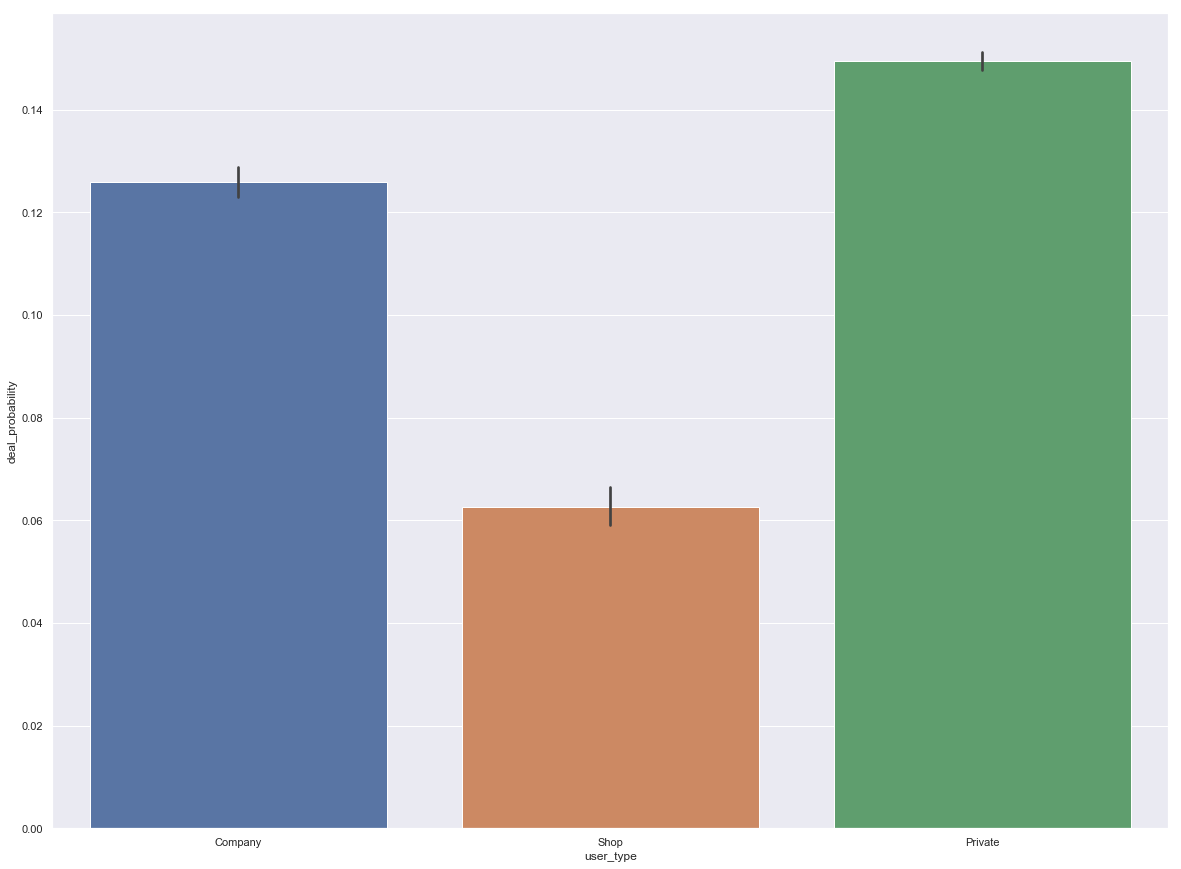

In [14]:
sns.barplot(x="user_type", y="deal_probability", data=subsampled_df);

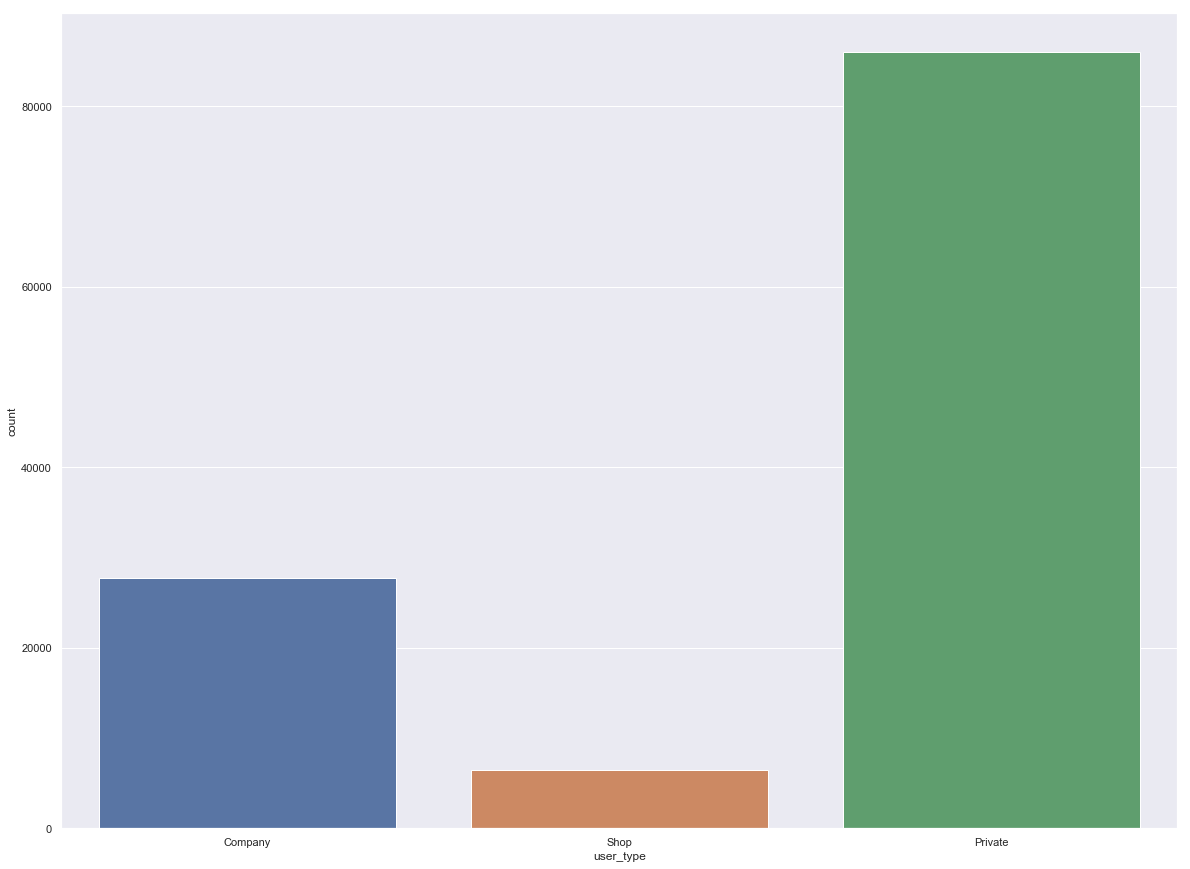

In [15]:
sns.countplot(x="user_type", data=subsampled_df);

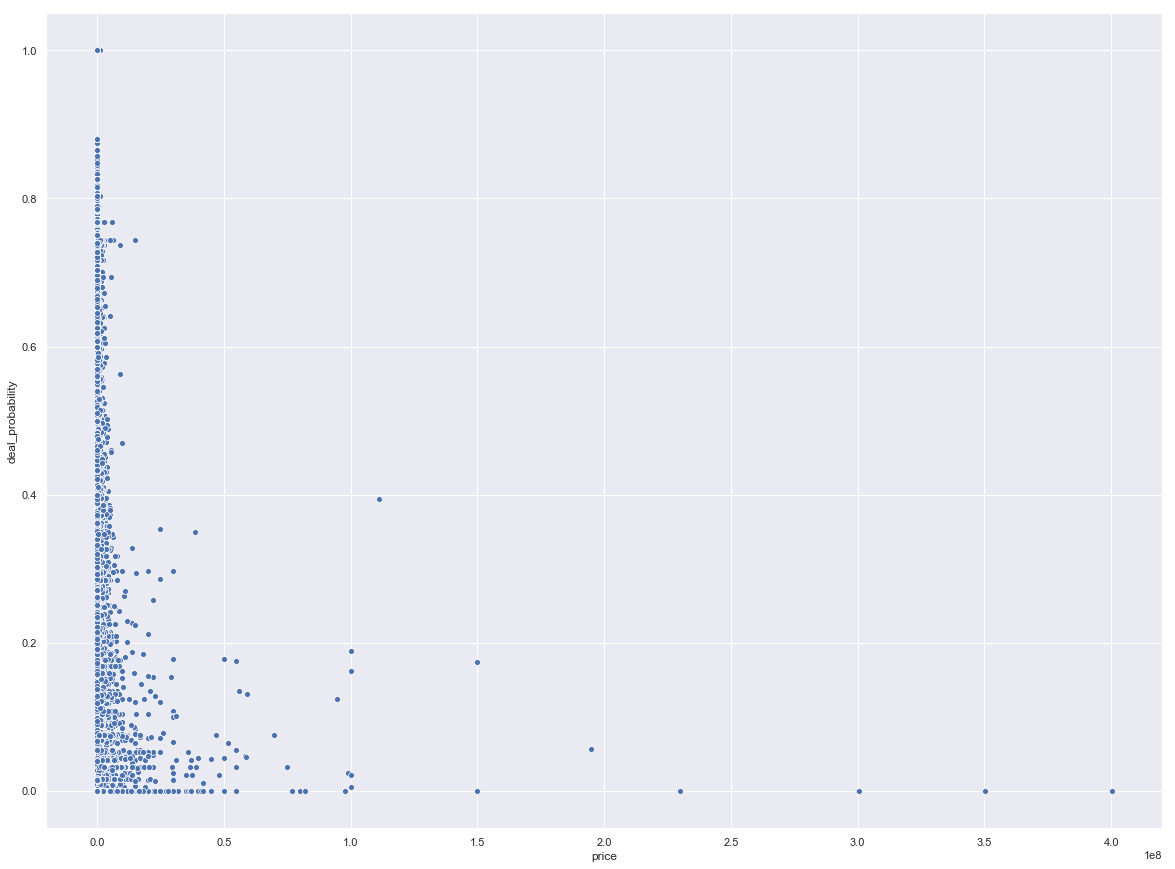

In [16]:
sns.scatterplot(x="price", y="deal_probability", data=subsampled_df);

In [17]:
subsampled_df.price.mean()

260154.17874425944

In [18]:
subsampled_df[subsampled_df.price > 0].price.mean()

260947.73846616328

In [19]:
subsampled_df[subsampled_df.price == 0].price.count()

345

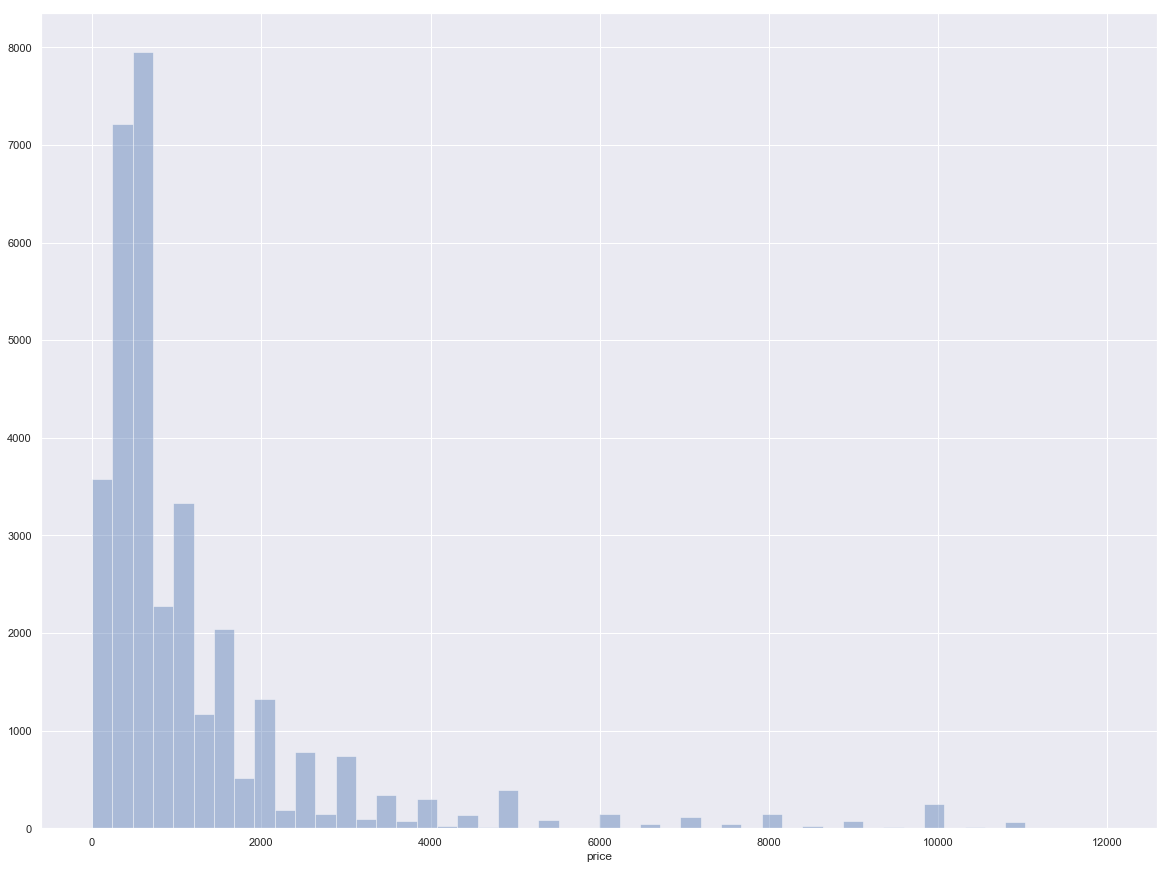

In [20]:
sns.distplot(subsampled_df[subsampled_df.price < subsampled_df.price.quantile(0.8)].dropna().price, kde=False);

In [21]:
len(df.city.unique())

1721

In [22]:
len(subsampled_df.category_name.unique())

47

In [23]:
len(subsampled_df.parent_category_name.unique())

9

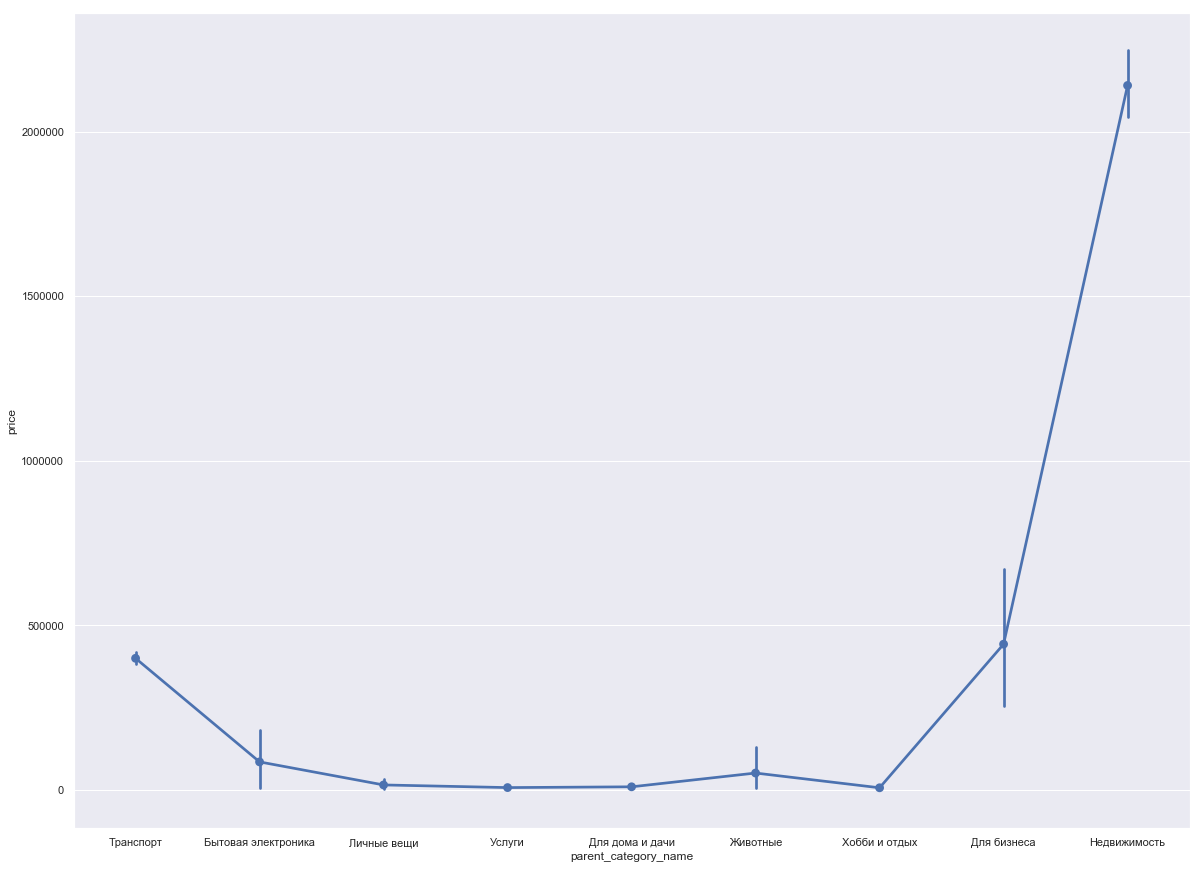

In [24]:
sns.pointplot(y = "price", x = "parent_category_name", data=subsampled_df);

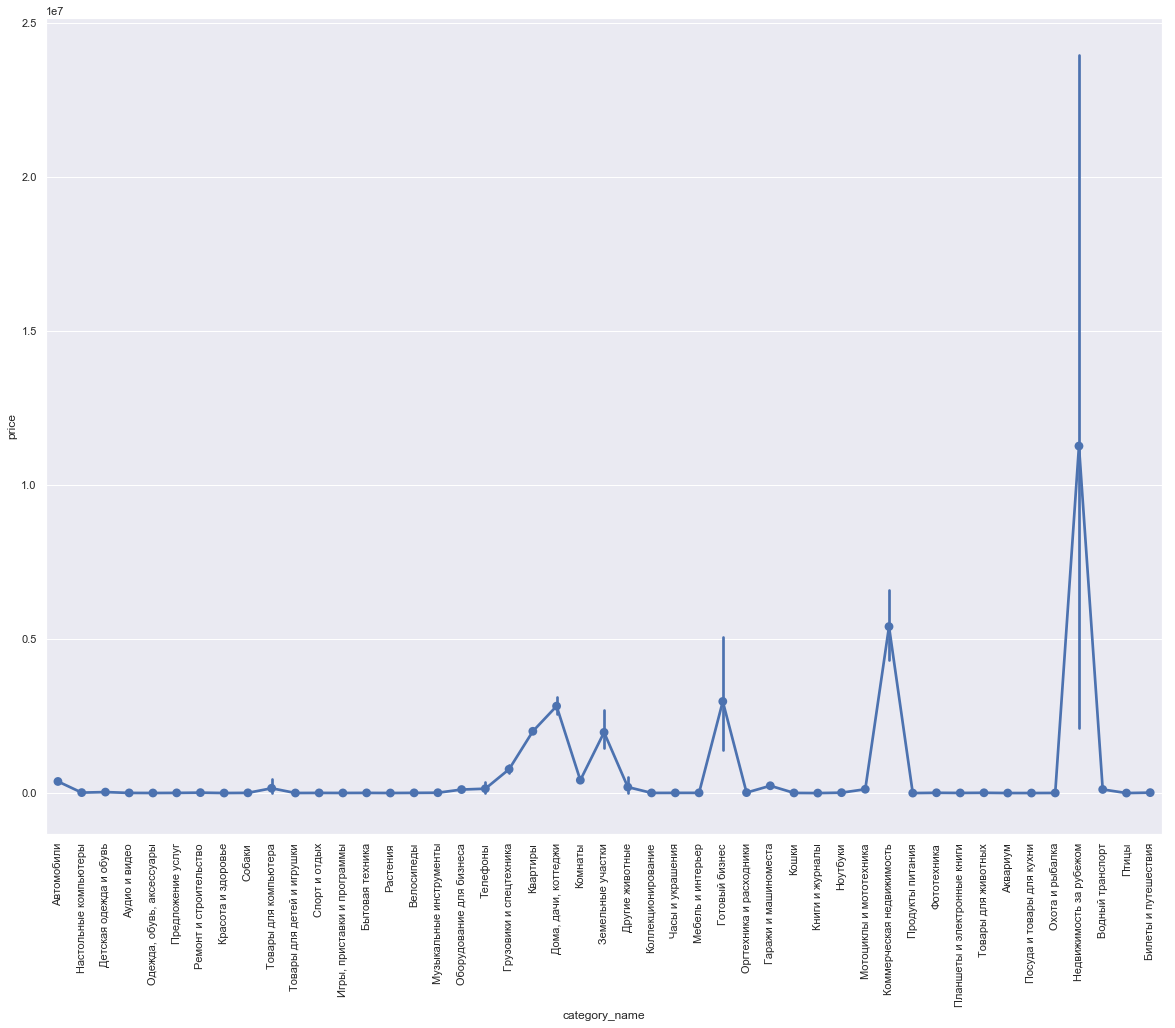

In [25]:
ax = sns.pointplot(y = "price", x="category_name", data=subsampled_df);
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

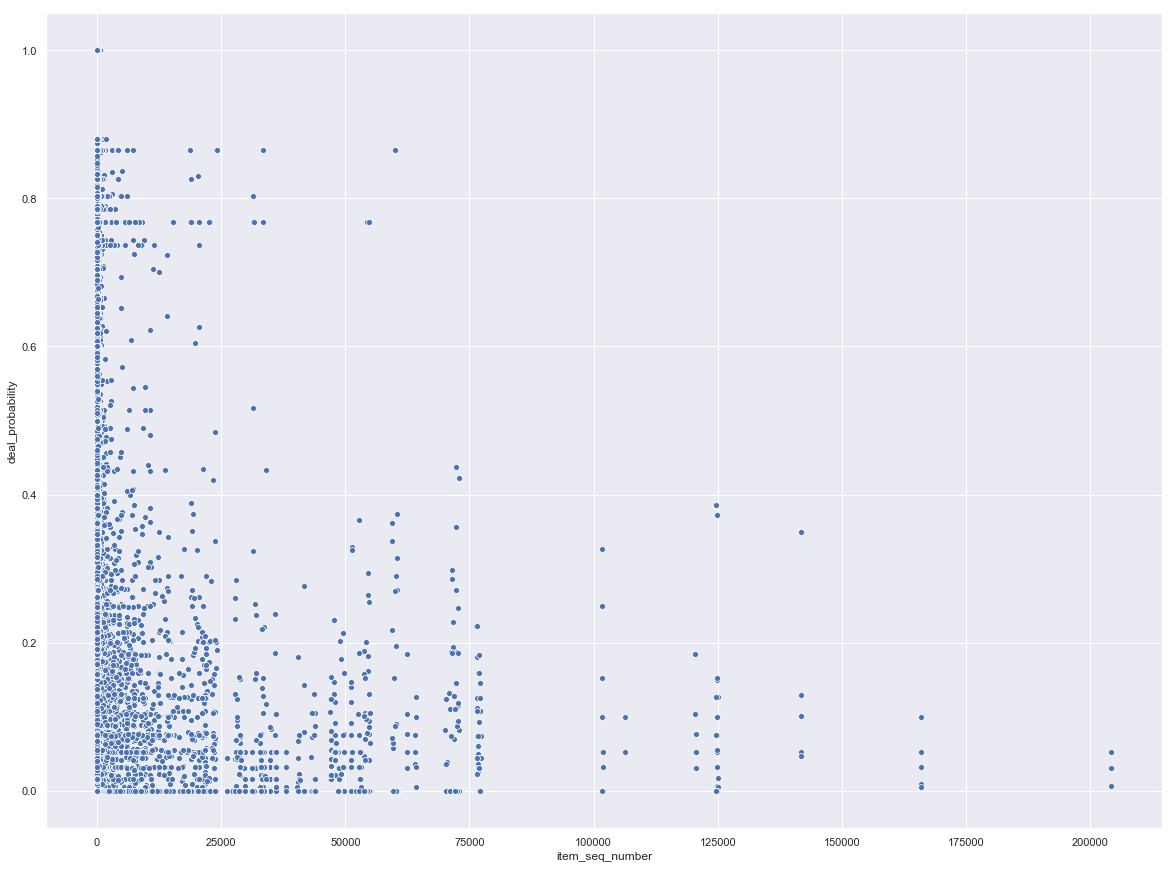

In [26]:
sns.scatterplot(x="item_seq_number", y="deal_probability", data=subsampled_df);

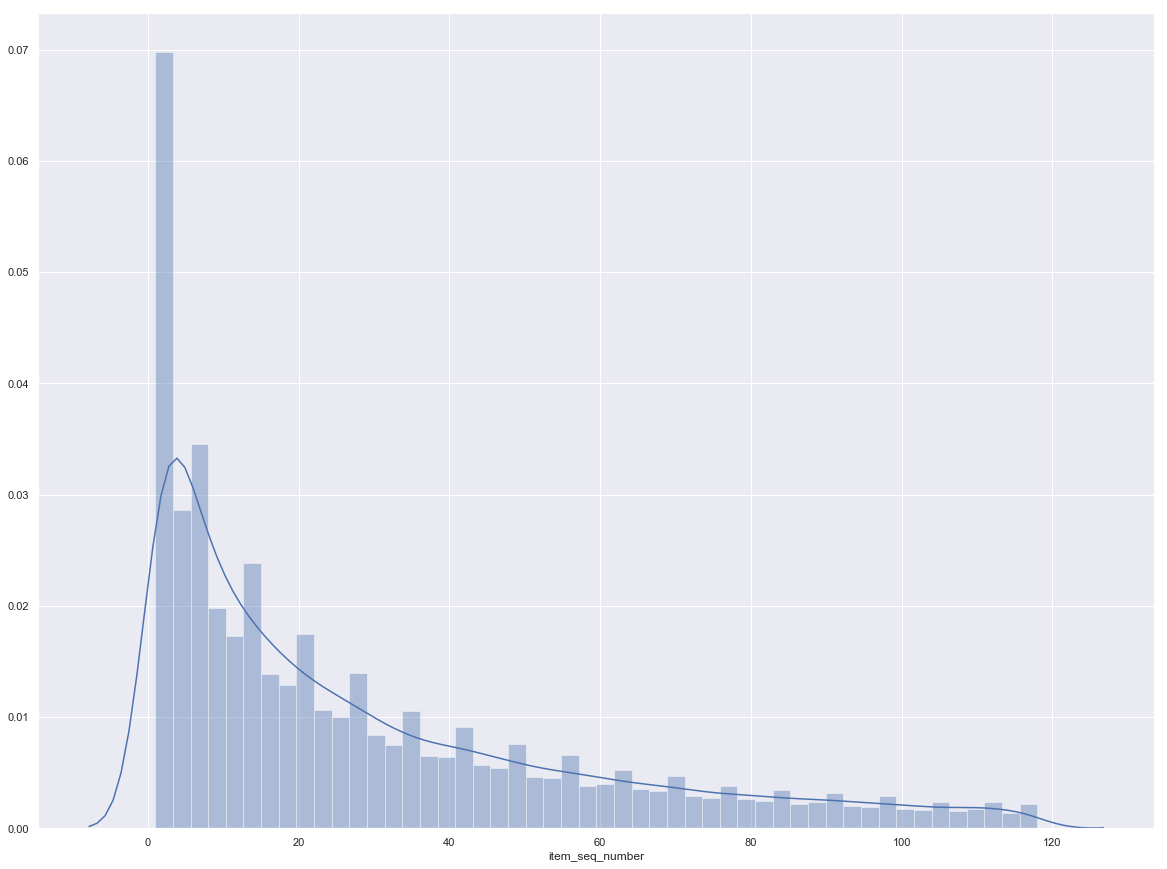

In [27]:
sns.distplot(subsampled_df.item_seq_number[subsampled_df.item_seq_number < subsampled_df.item_seq_number.quantile(0.8)]);

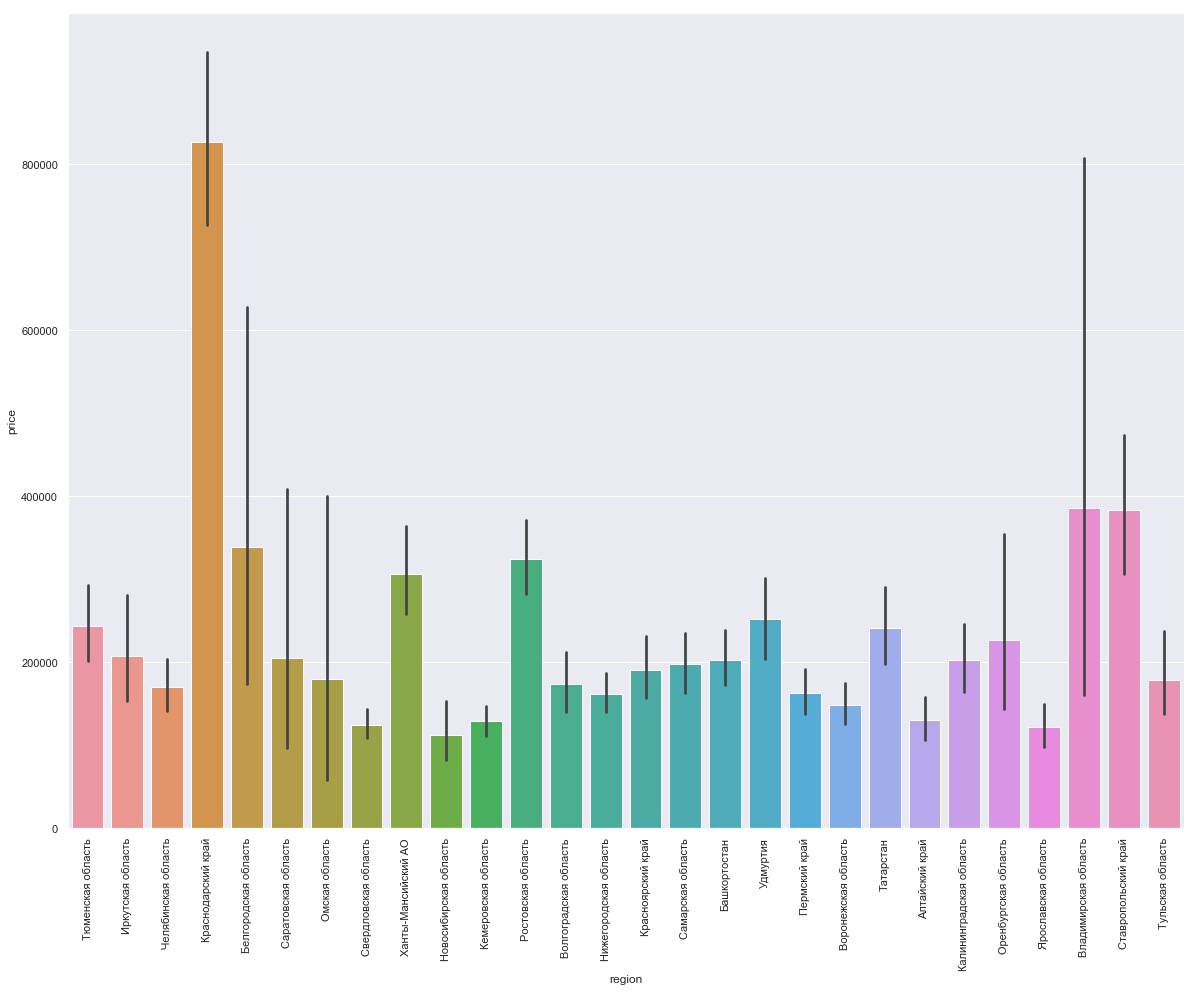

In [28]:
ax = sns.barplot(x="region", y="price", data=subsampled_df);
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

In [10]:
ax = sns.barplot(x="city", y="deal_probability", data=subsampled_df);
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

NameError: name 'subsampled_df' is not defined

In [30]:
most_common_regions = subsampled_df.region

In [31]:
regions, counts = np.unique(subsampled_df.region.values, return_counts=True)

In [32]:
counts[regions == "Красноярский край"]

array([4291], dtype=int64)

In [33]:
df.describe()

,Unnamed: 0,price,item_seq_number,image_top_1,deal_probability
count,1.202739e+06,1.134319e+06,1.202739e+06,1.112425e+06,1.202739e+06
mean,7.518493e+05,3.298231e+05,7.418944e+02,1.242702e+03,1.392107e-01
std,4.339926e+05,7.475818e+07,5.548895e+03,9.706580e+02,2.601816e-01
min,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,3.761640e+05,5.000000e+02,9.000000e+00,4.250000e+02,0.000000e+00
50%,7.518850e+05,1.300000e+03,2.900000e+01,1.057000e+03,0.000000e+00
75%,1.127594e+06,7.000000e+03,8.800000e+01,2.217000e+03,1.510200e-01
max,1.503423e+06,7.950101e+10,2.044290e+05,3.066000e+03,1.000000e+00


In [34]:
len(df.image_top_1.unique())

3060